# Basic libraries for data analisis. Math in machine learning

## Practical task. Analisys of "Titanic" passengers

In [2]:
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Read from file to Pandas.DataFrame object

In [3]:
data = pd.read_csv('titanic.csv')
data.shape

(891, 12)

**The first 5 rows of the table:**

In [12]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Consider first 10 elements of Parch column - ammount of parents and children on board:**

In [13]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**Choose passengers, who were shipping in Cherbourg (Embarked=C) and paid fare > 200.**

In [14]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [34]:
len(data[(data['Embarked'] == 'C') & (data['Fare'] > 200)])

12

**1. How many people were survived and how many died?**

In [27]:
# You code here
survive_count=len(data[(data['Survived'] == 1)])
print("Survived:",survive_count)

dead_count=len(data[(data['Survived'] == 0)])
print("Dead:",dead_count)

data.Survived.value_counts()


Survived: 342
Dead: 549


0    549
1    342
Name: Survived, dtype: int64

**2. Print the distribution of the Survived variable separately for men and separately for women.**

female    233
male      109
Name: Sex, dtype: int64


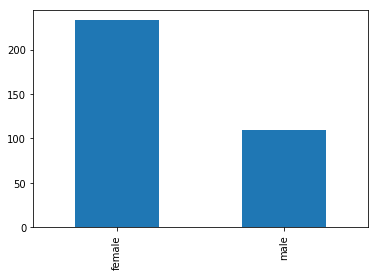

In [17]:
data[data['Survived'] == 1]['Sex'].value_counts().plot(kind='bar')
#data.Sex.value_counts().plot(kind='bar')
c=data[data['Survived'] == 1]['Sex'].value_counts()
print(c)
#data[data.Age.isnull()]
#data.Sex.value_counts()

**3. What is the median and standard deviation of ticket prices? Also plot a histogram of ticket prices.**


Median value : 14.4542

Standard Deviation= 49.693428597180905


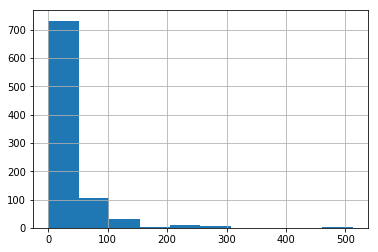

In [9]:
# You code here
#des=data.describe()
#print(des)
median=data["Fare"].median()
standard_deviation=data["Fare"].std()
print("\nMedian value :",median)
print("\nStandard Deviation=",standard_deviation)
#data["Fare"].mean()
data.Fare.hist()

**4. Calculate the percent of survivors among people under 25 and over 55. Calculate the average age of survivors.**

In [7]:
# You code here
#data.describe()
#per=(data[((data['Age'] < 25) |(data['Age'] > 55))] ['Survived']==1).value_counts()/len(data) * 100

per=(data[(data.Age < 25) | (data.Age > 55)].Survived.value_counts()/len(data)) * 100
print(per)
#a=data[data.Age.isnull()]
#print(a)
avrg=data[data['Survived']==1]['Age'].mean()
print(avrg)

False    21.099888
True     14.590348
Name: Survived, dtype: float64
28.343689655172415


**5. From what city embarked the most passengers?**

In [4]:
# You code here
data['Embarked'].value_counts()
a=data['Embarked'].value_counts().index[0]
a=data['Embarked'].value_counts().idxmax()
print(a)

S


**6. Calculate the average age of passengers in each of the three classes.**

In [33]:
# You code here
one=data[data['Pclass'] == 1]['Age'].mean()
two=data[data['Pclass'] == 2]['Age'].mean()
three=data[data['Pclass'] == 3]['Age'].mean()
print(one)
print(two)
print(three)

38.233440860215055
29.87763005780347
25.14061971830986


**7. Compare the fare distributions of survived and dead.**

In [5]:
bins=[50,100,150,200,250,300]
data['FareBin']=pd.cut(data['Fare'],bins)
a=data.groupby(by= 'Survived')['Fare'].mean()
print(a)


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


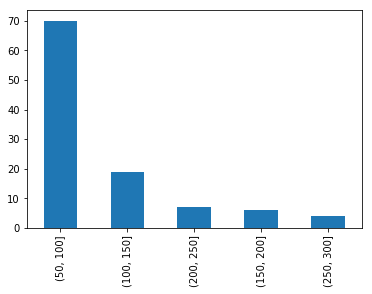

In [34]:
survived=data[(data['Survived']==1) ]['FareBin'].value_counts().plot(kind='bar')

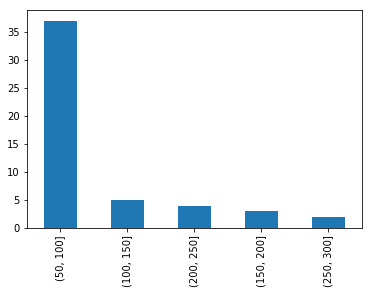

In [13]:
dead=data[(data['Survived']==0) ]['FareBin'].value_counts().plot(kind='bar')

**8. Calculate the average age of surviving men who bought a ticket to Pclass 2.**

In [134]:
# You code here
data[(data['Pclass'] == 2) & (data['Sex'] == 'male') & data['Survived' ]== 1]['Age'].mean()

16.022

**9. Create a new column that will indicate whether the passenger has relatives. Calculate the correlation between it and Survived column.**

In [30]:
# You code 
sLength= len(data['SibSp'])
data['HasRelatives'] = pd.Series(np.random.randn(sLength), index=data.index)
#print(data.columns.values)\
rel=[]
sbsp=data['SibSp']
parch=data['Parch']
for i in range (data.shape[0]):
    if (sbsp[i]!= 0 or parch[i]!= 0):
        rel.append(1)
    else:
        rel.append(0)
data['HasRelatives']=rel
data['HasRelatives'].corr(data['Survived'])
#data.head(15)


0.2033670856998922